In [1]:
import matplotlib.pyplot as plt
import numpy as np
from python_code.nord_cmap import *
from scipy.optimize import curve_fit

In [2]:
n_cycles = np.array([
    500, 
    600,
    700,
    800,
    850,
    900,
    910,
    920,
    930,
    940, 
    950,
    955, 
    960,
    965,
    970,
    972,
    974,
])

mean_values = np.array([
    5.52,
    5.64, 
    5.75, 
    5.8, 
    5.88,
    6.1,
    6.23, 
    6.33, 
    6.5, 
    6.6, 
    6.7, 
    6.82, 
    6.94, 
    7, 
    7.1, 
    7.16, 
    7.24, 
])

delta_t = 10 - 2 * (n_cycles - 500) / 100

In [3]:
delta_t

array([10.  ,  8.  ,  6.  ,  4.  ,  3.  ,  2.  ,  1.8 ,  1.6 ,  1.4 ,
        1.2 ,  1.  ,  0.9 ,  0.8 ,  0.7 ,  0.6 ,  0.56,  0.52])

In [4]:
def equation(t, tau, t_0, B) : 
    return np.exp(-(t - t_0) / tau) + B

In [5]:
p_opt, p_cov = curve_fit(equation, delta_t, mean_values, p0=[2,2, 5.5])
delta_t_fit = np.linspace(0, 10, 1000)
sigma = np.sqrt(np.sum(np.diag(p_cov)))

In [6]:
p_0 = [2, 2, 5.5]

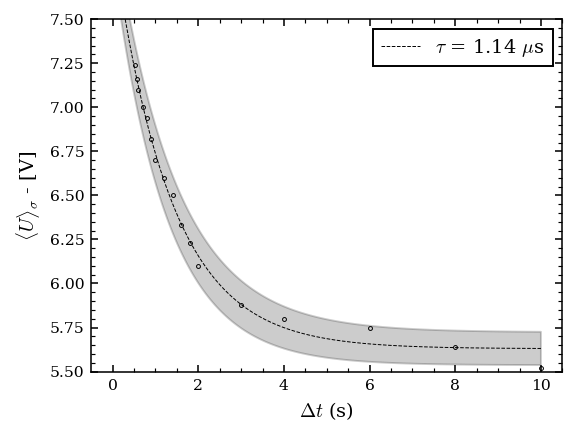

In [8]:
fig, ax = plt.subplots(figsize = (4,3))
ax.plot(delta_t, mean_values, 'o', markersize = 2, mfc = (0,0,0,0), mec = 'k', mew = .5)
ax.plot(delta_t_fit, equation(delta_t_fit, *p_opt),'--',  color='k', linewidth=.5, label = '$\\tau$ = %.2f $\\mu$s' % (p_opt[1] ))
ax.fill_between(delta_t_fit, equation(delta_t_fit, *(p_opt + sigma)), equation(delta_t_fit, *(p_opt - sigma)), color='k', alpha=0.2)
ax.set_xlabel(r'$\Delta t$ (s)', fontsize = 10)
ax.set_ylabel(r'$\langle U \rangle_\sigma$ - [V]', fontsize = 10)
ax.set_ylim(5.5, 7.5)
ax.legend(loc = 'upper right', fontsize = 10)
plt.savefig('relaxation.png', dpi = 300, bbox_inches='tight')
